<a href="https://colab.research.google.com/github/stehrbaer/Evaluating-Soft-Actor-Critic-Agent-Performance-of-Equity-Trading-using-FinRL-/blob/main/Github__AC_Alpaca_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Soft Actor Critic Agent using FinRL trading DOW-30 Index**

The goal of this project was to create a deep-learning trading agent that can be paired with a trading platform to effectively trade equities based on indicators and financial data.

Soft Actor Critic is an actor-critic reinforcement learning algorithm developed by Google and UC Berkley. The algorithm is based on a maximum entropy reinforcement learning method, and its goal is to identify the best course of action that maximizes both long-term expected reward and long-term entropy. 

The actor-critic algorithm employs two networks, an actor and a critic, where the actor makes decisions, and the critic evaluates the actor's decisions and rewards and adjusts the actor's decisions based on the environment setting. Learning is achieved in a value-based fashion, where the training reward is based on minimizing the squared difference between the expected predicted value of the Q function and the discounted value of the future state value of the next time step.  

Throughout this project, we will train, test and implement the agent via Fin RL and Elegant RL libraries. These libraries will be utilized to create the SAC Agent.

All Code is sourced from AI4Finance using the FinRL and ElegantRL Python Libraries. 

Elegant RL And FinRL Repositories:
https://github.com/AI4Finance-Foundation

Elegant RL: https://github.com/AI4Finance-Foundation/ElegantRL

FinRL: https://github.com/AI4Finance-Foundation/FinRL


**Requirments**

Guide for installing FinRL can be found below:
https://github.com/AI4Finance-Foundation/FinRL/blob/master/docs/source/start/installation.rst

Required Packages to run FinRL library on MACinclude:
- Python 3.7
- Anaconda 
- Homebrew
- OpenAI

Following installation, install or run FinRL library.

In [ ]:
# installing finrl library

#@misc{erl,
 # author = {Liu, Xiao-Yang and Li, Zechu and Wang, Zhaoran and Zheng, Jiahao},
 # title = {{ElegantRL}: Massively Parallel Framework for Cloud-native Deep Reinforcement Learning},
 # year = {2021},
 # publisher = {GitHub},
 # journal = {GitHub repository},
 # howpublished = {\url{https://github.com/AI4Finance-Foundation/ElegantRL}},
#}


!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-n19twlea
  Running command git clone -q https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-n19twlea
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-dmv163_7/pyfolio_1030399a1c3544629325e4b310624550
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-dmv163_7/pyfolio_1030399a1c3544629325e4b310624550
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-dmv163_7/elegantrl_8c5fb44495ea4309b3c04e92a064d91c
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-dmv163_7/elegantrl_8c5fb44495ea4309b3c04e92a064d91c
     |████████████████████████████████| 2.3 MB 7.3 MB/s 
     |████████████████████████████████| 234 kB 65.8 MB/s 
     |████████████████████████

**Packages**
 
 The following packages must be installed before running the code below:
 - Pandas 
 - Numpy
 - Matplot Library 
 - Date Time
 - FinRL 
 - Alpaca Trading 
 - TensorFlow
 - Open AI Gym 
 - stable-baselines
 - Pyfolio
 - Yahoo Finance API


In [ ]:
#Importing relevant packages for plotting and data extracting and processing
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline, trx_plot
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

In [ ]:
#from Fin RL import relevant libraries to Train and Test Agent 
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [ ]:
#Configuring start and end for training and back testing period for trading 
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

In [ ]:
TRAIN_START_DATE = '2017-01-01'
TRAIN_END_DATE = '2022-08-01'
TRADE_START_DATE = '2020-08-01'
TRADE_END_DATE = '2022-08-01'

In [ ]:
#Using Yahoo Finance to download dataset, the DOW-30 Index was chosen 
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2017-01-03,28.950001,29.082500,28.690001,27.219833,115127600,AAPL,1
1,2017-01-03,147.860001,151.000000,147.119995,127.357086,3640900,AMGN,1
2,2017-01-03,74.889999,75.750000,74.739998,69.324295,5853900,AXP,1
3,2017-01-03,156.300003,157.139999,155.210007,145.533646,3426100,BA,1
4,2017-01-03,94.000000,95.190002,93.250000,81.168266,5054900,CAT,1


**Assessing Risk within Dataset**

By adding technical indicators such as;
- the Moving Average Convergence / DIvergence Oscilitor (MACD) 
- Bollinger Bands (BB) 
- Relative Strength Index (RSI) 
- Simple Moving Averages (SMA 30 / SMA 60)
- Directional Index (DX) 
- Commodity Channel Index (CCI)

The dataset becomes more comprehensive and allows the algorithm to better evaluate price and volume fluctuations. With momentum and trend based indicators, the algorithm can learn and act upon trading signals generated by the indicators. 

Additionally, by adding parameters such as the Volatility Index (VIX) and Turbulence that assess volatility, in addition to the technical indicators, the dataset provides the algorithm inate measures of risk which it can use to further evaluate buy, sell or holding actions within the virtual environment.

In [ ]:
#adding turbulence, Vix and other technical indicators to dataset
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)


120 minutes til market open.
120 minutes til market open.
Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1402, 8)
Successfully added vix
Successfully added turbulence index


In [ ]:
#processing datasets 
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [ ]:
#fully processed dataset to be used for training 
processed_full.sort_values(['date','tic'],ignore_index=True).head(30)


,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2017-01-03,AAPL,28.950001,29.082500,28.690001,27.219833,115127600.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,27.219833,27.219833,12.85,0.0
1,2017-01-03,AMGN,147.860001,151.000000,147.119995,127.357086,3640900.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,127.357086,127.357086,12.85,0.0
2,2017-01-03,AXP,74.889999,75.750000,74.739998,69.324295,5853900.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,69.324295,69.324295,12.85,0.0
3,2017-01-03,BA,156.300003,157.139999,155.210007,145.533646,3426100.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,145.533646,145.533646,12.85,0.0
4,2017-01-03,CAT,94.000000,95.190002,93.250000,81.168266,5054900.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,81.168266,81.168266,12.85,0.0
5,2017-01-03,CRM,69.290001,70.860001,69.000000,70.540001,8112200.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,70.540001,70.540001,12.85,0.0
6,2017-01-03,CSCO,30.370001,30.559999,30.209999,25.578665,22370600.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,25.578665,25.578665,12.85,0.0
7,2017-01-03,CVX,118.379997,119.000000,116.589996,91.733322,7404800.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,91.733322,91.733322,12.85,0.0
8,2017-01-03,DIS,105.300003,106.900002,105.209999,101.584351,8884300.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,101.584351,101.584351,12.85,0.0
9,2017-01-03,GS,242.699997,244.970001,237.970001,218.627563,4384200.0,1.0,0.000000,27.247686,27.161515,0.0,66.666667,100.0,218.627563,218.627563,12.85,0.0


In [ ]:
#Splitting dataset into training and testing periods 
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

40658
14529


In [ ]:
#Setting up dimensions for training environment, featuring dimensions for equities to be traded as well as transaction costs for each action buy the agent when selling or buying
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension



Stock Dimension: 29, State Space: 291


In [ ]:
#setting environment parameters for agent to trade
env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


In [ ]:
e_train_gym = StockTradingEnv(df = train, **env_kwargs)


In [ ]:

env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))


<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [ ]:
#setting up agent
agent = DRLAgent(env = env_train)


In [ ]:
#setting up agent and agent environment for training, selecting the Soft Actor Critical (SAC) agent 
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0003,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0003, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


**Algorithm at work**

During training, a SAC agent:

* Updates the actor and critic properties at regular intervals during learning.

* Estimates the mean and standard deviation of a Gaussian probability distribution for the continuous action space, then randomly selects actions based on the distribution.

* Updates an entropy weight term that balances the expected return and the entropy of the policy.

* Stores past experience using a circular experience buffer. The agent updates the actor and critic using a mini-batch of experiences randomly sampled from the buffer.

Source: mathworks.com/help/reinforcement-learning/ug/sac-agents.html

In [ ]:
#training SAC Agent
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=60000)

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 23        |
|    time_elapsed    | 234       |
|    total_timesteps | 5608      |
| train/             |           |
|    actor_loss      | -3.74     |
|    critic_loss     | 0.132     |
|    ent_coef        | 0.0203    |
|    ent_coef_loss   | -190      |
|    learning_rate   | 0.0003    |
|    n_updates       | 5507      |
|    reward          | 0.0335811 |
----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 24         |
|    time_elapsed    | 467        |
|    total_timesteps | 11216      |
| train/             |            |
|    actor_loss      | -5.17      |
|    critic_loss     | 0.0133     |
|    ent_coef        | 0.00379    |
|    ent_coef_loss   | -267       |
|    learning_rate   | 0.0003     |
|    n_updates       | 11115      |
|    re

In [ ]:
#saving trained model in directory
trained_sac.save(TRAINED_MODEL_DIR + config.TRAINED_MODEL_DIR+'/trained_sac.model')


/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'trained_modelstrained_models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


**Environment Parameter**

When testing the parameters for training the agent, the agents performance seemingly improved with a higher learning rate, showing higher returns but also better risk management in terms of asset allocation. 

The agent throughout this project features a learning rate of 0.0003, while on previous edition tested the learning rate was 0.0001. This adjustment proved to be a vital factor in improving the agent's performance. 

**SAC Agent (LR = 0.0001)**
*   Annual Returns = 18.85%
*   Cumulative Returns = 40.97%
*   Sharpe Ratio = 1.1444
*   Annual Volatility = 16.2%
*   Stability = 72.5%
*   Max Drawdown = -19%

**SAC Agent (LR = 0.0003)**

*  Annual Returns = 65.2%
*  Cumulative Returns =  171%
*   Sharpe Ratio = 2.74
*   Annual Volatility = 19%
*   Stability = 96.5%
*   Max Drawdown = -9.8%













In [ ]:
#assessing risk indicators for trading set
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [ ]:
#assessing the highest propensity of risk, in terms of volatility, experienced throughout trading period.
#using the risk indicator, the agent will be instructed to halt trading if volatility within the environment becomes too high 
insample_risk_indicator.vix.describe()
insample_risk_indicator.vix.quantile(0.996)


65.73800091552732

In [ ]:
#setting a turbulence threshold of 70 or above will tell the agent to sell assets if VIX indicator surpasses that threshold within trading environment 
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [ ]:
trade.head()


,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-08-03,AAPL,108.199997,111.637497,107.892502,107.444435,308151200.0,0.0,3.171823,103.470931,87.463558,70.521040,323.226015,54.902680,93.501436,86.994729,24.280001,42.780855
0,2020-08-03,AMGN,244.850006,249.020004,244.529999,231.064774,1853900.0,0.0,1.858804,243.829401,227.673135,53.383729,-12.159197,9.353158,232.128733,222.506363,24.280001,42.780855
0,2020-08-03,AXP,93.309998,94.400002,92.440002,91.245560,2869000.0,0.0,-0.470041,95.734147,89.044430,48.243317,-76.616012,15.175595,92.718174,93.309429,24.280001,42.780855
0,2020-08-03,BA,156.509995,163.580002,153.410004,162.270004,38520500.0,0.0,-4.022719,188.746996,159.345003,46.546448,-196.847858,24.639025,176.857668,169.354668,24.280001,42.780855
0,2020-08-03,CAT,132.300003,133.000000,131.100006,126.191902,2851100.0,0.0,2.380116,137.652618,119.366813,52.933878,7.073947,2.163189,125.471510,120.007847,24.280001,42.780855


In [ ]:
#trading in virtual environment with SAC agent 
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

hit end!


In [ ]:
df_account_value.loc[0,'date']
df_account_value.loc[len(df_account_value)-1,'date']


'2022-07-28'

In [ ]:
#trades performed by agent in virtual environment
df_actions.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2020-08-03,0,51,52,0,34,4,0,47,51,77,...,0,0,9,49,35,41,0,21,0,0
2020-08-04,0,-51,-52,0,81,-4,0,98,99,0,...,0,0,-9,0,0,0,0,-21,0,0
2020-08-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-08-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21,0,0,1,0,28,0,-6,0,95,0,...,-39,0,-88,0,0,0,0,0,0,0
2022-07-22,0,0,30,0,0,0,0,0,95,0,...,-43,0,-86,0,0,0,0,0,0,0
2022-07-25,0,0,0,0,0,0,0,0,2,33,...,-28,0,-77,0,0,0,0,0,0,0


**Agent Action Summary**

In the plot below, we can assess the agent buying and selling decision based on the risk assessment performed in the file (Risk Assessment.ipynb). 

From the risk assessment, we were able to classify the selected equities within the DOW Jones index via returns to volatility. Based on modern portfolio theory, any equity that features a higher ratio of returns to risk, should be bought or traded more often than equities that should low or negative ratios. 

Comparing the best eight performing equities within the DOW-30 versus the eight worst performing equities, we can see that the SAC agent does favor the equities with higher ratios. 

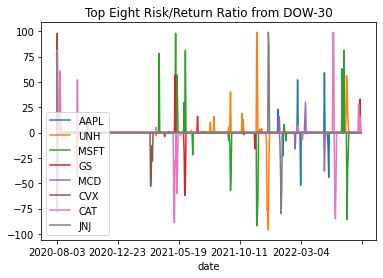

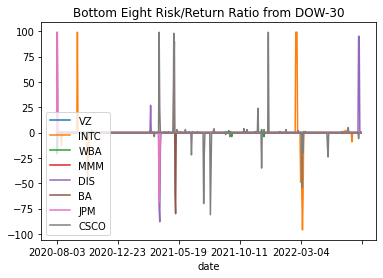

In [ ]:
%matplotlib inline
ori_name = ["AAPL", "AMGN", "VZ", "PG", "HON", "MRK", "CSCO", "MMM", "NKE", "CVX","WBA", "INTC", "JNJ", "DIS", "CAT", "MCD", "TRV", "KO", "AXP", "WMT", "UNH", "BA", "MSFT", "GS", "IBM","HD","V","JPM","CRM"]
actions = df_actions


actions[["AAPL", "UNH", "MSFT", "GS", "MCD", "CVX", "CAT", "JNJ"]].plot()
plt.title("Top Eight Risk/Return Ratio from DOW-30")
plt.show()


actions[["VZ", "INTC", "WBA", "MMM", "DIS", "BA", "JPM", "CSCO"]].plot()
plt.title("Bottom Eight Risk/Return Ratio from DOW-30")
plt.show()

In [ ]:
#The backtest results from the SAC Agent showcase the performance of the agent trading the DOW Jones index throughout the two year trading period

print("Backtest Results")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

Backtest Results
Annual return          0.652492
Cumulative returns     1.714451
Annual volatility      0.190172
Sharpe ratio           2.743434
Calmar ratio           6.662857
Stability              0.964649
Max drawdown          -0.097930
Omega ratio            1.599137
Sortino ratio          4.662971
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.366369
Daily value at risk   -0.021889
dtype: float64


In [ ]:
#Comparison to benchmark (DOW Jones Index)
print("Benchmark")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

Benchmark
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (500, 8)
Annual return          0.099698
Cumulative returns     0.207512
Annual volatility      0.157527
Sharpe ratio           0.683398
Calmar ratio           0.530880
Stability              0.387609
Max drawdown          -0.187797
Omega ratio            1.121917
Sortino ratio          0.957309
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.909575
Daily value at risk   -0.019419
dtype: float64


Comparion to Benchmark (Dow Jones)
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (500, 8)


Start date,2020-08-03
End date,2022-07-28
Total months,23
,Backtest
Annual return,65.249%
Cumulative returns,171.445%
Annual volatility,19.017%
Sharpe ratio,2.74
Calmar ratio,6.66
Stability,0.96
Max drawdown,-9.793%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.79,2022-05-31,2022-06-16,NaT,NaN
1,8.52,2020-10-23,2020-10-28,2020-11-09,12
2,8.10,2021-01-14,2021-01-27,2021-02-08,18
3,7.50,2020-09-02,2020-09-23,2020-10-12,29
4,7.29,2022-04-20,2022-05-02,2022-05-25,26


Stress Events,mean,min,max
New Normal,0.21%,-3.80%,7.62%


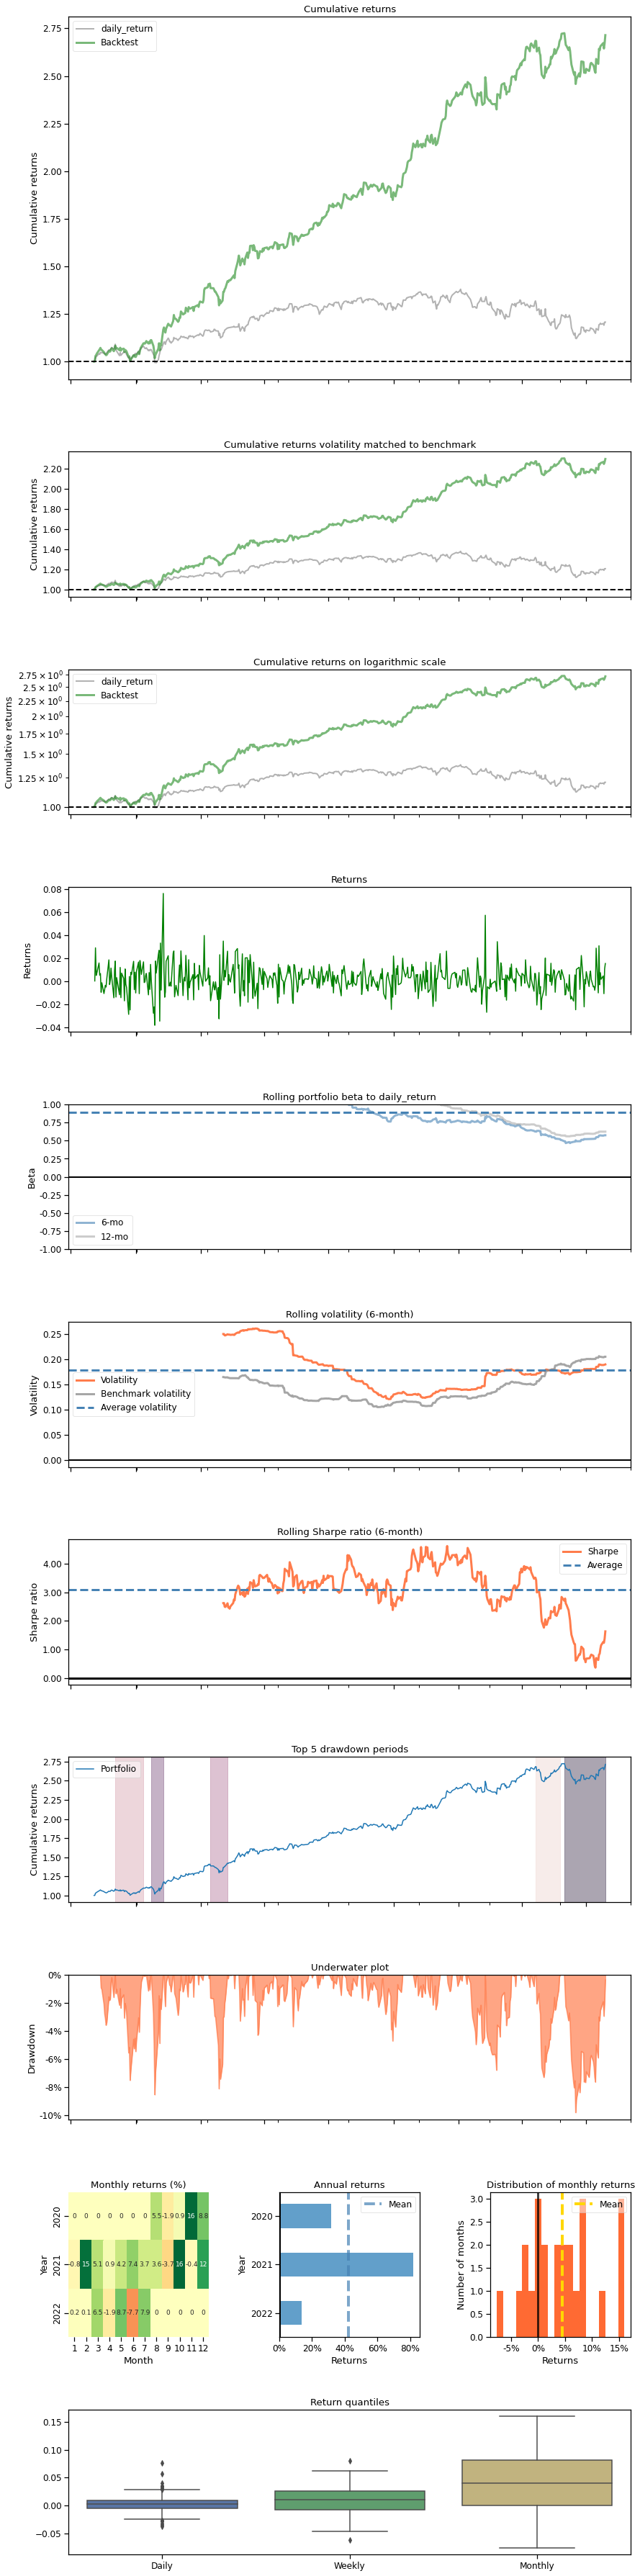

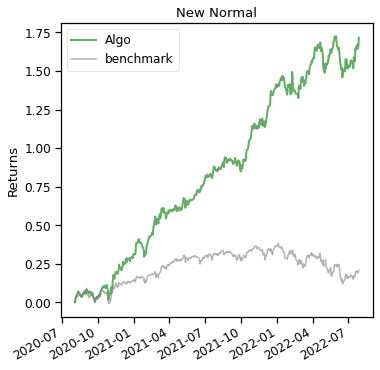

In [ ]:
print("Comparion to Benchmark (Dow Jones)")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

**Back Test Performance of SAC Agent** 

From the back test plots above, we can evaluate the SAC agents performance versus the DOW Jones Index as benchmark.

Overall, the agent well outperforms the benchmark in terms of returns (cumulative and annual) and risk assessment (Sharpe Ratio, Calmar, Rolling Volatility) when making buying, selling or holding actions. 

The SAC algorithm determines the best course of action by maximising the entropy of the policy as well as the long-term expected payoff. A measurement of policy uncertainty given the situation is the policy entropy. Further entropy encourages greater exploration of the data. Exploration and exploitation of the environment are balanced by maximising both the reward and the entropy. This is only possible in a a continuous action space, making it a great candidate for live trading. 

As mentioned before, the agent's increased performance can in part be attributed to the addition of risk assessing indicators and setting parameters to stop trading when the volatility becomes too high, but also to the training parameters of the model. 



In [ ]:
#importing relevant packages for setting up Alpaca Trading
import datetime
import threading
from finrl.meta.data_processors.processor_alpaca import AlpacaProcessor
import alpaca_trade_api as tradeapi
import time
import pandas as pd
import numpy as np
import torch
import gym
from finrl.config_tickers import DOW_30_TICKER

class Alpaca_Paper_Trading():

    def __init__(self,ticker_list, time_interval, drl_lib, agent, cwd, net_dim, 
                 state_dim, action_dim, API_KEY, API_SECRET, 
                 API_BASE_URL, tech_indicator_list, turbulence_thresh=30, 
                 max_stock=1e2, latency = None):
        #load agent
        self.drl_lib = drl_lib
        if agent =='sac':
            if drl_lib == 'elegantrl':              
                from elegantrl.agents import AgentSAC
                from elegantrl.train.run import init_agent
                from elegantrl.train.config import Arguments
                #load agent
                config = {'state_dim':state_dim,
                            'action_dim':action_dim,}
                args = Arguments(agent_class=AgentSAC, env=StockEnvEmpty(config))
                args.cwd = cwd
                args.net_dim = net_dim
                # load agent
                try:
                    agent = init_agent(args, gpu_id = 0)
                    self.act = agent.act
                    self.device = agent.device
                except BaseException:
                    raise ValueError("Fail to load agent!")
                        
            elif drl_lib == 'rllib':
                from ray.rllib.agents import sac
                from ray.rllib.agents.sac.sac import SACTrainer
                
                config = sac.DEFAULT_CONFIG.copy()
                config['env'] = StockEnvEmpty
                config["log_level"] = "WARN"
                config['env_config'] = {'state_dim':state_dim,
                            'action_dim':action_dim,}
                trainer = SACTrainer(env=StockEnvEmpty, config=config)
                trainer.restore(cwd)
                try:
                    trainer.restore(cwd)
                    self.agent = trainer
                    print("Restoring from checkpoint path", cwd)
                except:
                    raise ValueError('Fail to load agent!')
                    
            elif drl_lib == 'stable_baselines3':
                from stable_baselines3 import SAC
                
                try:
                    #load agent
                    self.model = SAC.load(cwd)
                    print("Successfully load model", cwd)
                except:
                    raise ValueError('Fail to load agent!')
                    
            else:
                raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
               
        else:
            raise ValueError('Agent input is NOT supported yet.')
            
            
            
        #connect to Alpaca trading API
        try:
            self.alpaca = tradeapi.REST(API_KEY,API_SECRET,API_BASE_URL, 'v2')
        except:
            raise ValueError('Fail to connect Alpaca. Please check account info and internet connection.')
        
        #read trading time interval
        if time_interval == '1s':
            self.time_interval = 1
        elif time_interval == '5s':
            self.time_interval = 5
        elif time_interval == candle_time_interval:
            self.time_interval = 60
        elif time_interval == '5Min':
            self.time_interval = 60 * 5
        elif time_interval == '15Min':
            self.time_interval = 60 * 15
        elif time_interval == '30Min':
            self.time_interval = 60 * 30
        elif time_interval == '60Min':
            self.time_interval = 60 * 60
        else:
            raise ValueError('Time interval input is NOT supported yet.')
        
        #read trading settings
        self.tech_indicator_list = tech_indicator_list
        self.turbulence_thresh = turbulence_thresh
        self.max_stock = max_stock 
        
        #initialize account
        self.stocks = np.asarray([0] * len(ticker_list)) #stocks holding
        self.stocks_cd = np.zeros_like(self.stocks) 
        self.cash = None #cash record 
        self.stocks_df = pd.DataFrame(self.stocks, columns=['stocks'], index = ticker_list)
        self.asset_list = []
        self.price = np.asarray([0] * len(ticker_list))
        self.stockUniverse = ticker_list
        self.turbulence_bool = 0
        self.equities = []
        
    def test_latency(self, test_times = 10): 
        total_time = 0
        for i in range(0, test_times):
            time0 = time.time()
            self.get_state()
            time1 = time.time()
            temp_time = time1 - time0
            total_time += temp_time
        latency = total_time/test_times
        print('latency for data processing: ', latency)
        return latency
        
    def run(self):
        orders = self.alpaca.list_orders(status="open")
        for order in orders:
          self.alpaca.cancel_order(order.id)
    
        # Wait for market to open.
        print("Waiting for market to open...")
        tAMO = threading.Thread(target=self.awaitMarketOpen)
        tAMO.start()
        tAMO.join()
        print("Market opened.")
        while True:

          # Figure out when the market will close so we can prepare to sell beforehand.
          clock = self.alpaca.get_clock()
          closingTime = clock.next_close.replace(tzinfo=datetime.timezone.utc).timestamp()
          currTime = clock.timestamp.replace(tzinfo=datetime.timezone.utc).timestamp()
          self.timeToClose = closingTime - currTime
    
          if(self.timeToClose < (60)):
            # Close all positions when 1 minutes til market close.
            print("Market closing soon. Stop trading.")
            break
            
            '''# Close all positions when 1 minutes til market close.
            print("Market closing soon.  Closing positions.")
    
            positions = self.alpaca.list_positions()
            for position in positions:
              if(position.side == 'long'):
                orderSide = 'sell'
              else:
                orderSide = 'buy'
              qty = abs(int(float(position.qty)))
              respSO = []
              tSubmitOrder = threading.Thread(target=self.submitOrder(qty, position.symbol, orderSide, respSO))
              tSubmitOrder.start()
              tSubmitOrder.join()
    
            # Run script again after market close for next trading day.
            print("Sleeping until market close (15 minutes).")
            time.sleep(60 * 15)'''
            
          else:
            trade = threading.Thread(target=self.trade)
            trade.start()
            trade.join()
            last_equity = float(self.alpaca.get_account().last_equity)
            cur_time = time.time()
            self.equities.append([cur_time,last_equity])
            time.sleep(self.time_interval)
            
    def awaitMarketOpen(self):
        isOpen = self.alpaca.get_clock().is_open
        while(not isOpen):
          clock = self.alpaca.get_clock()
          openingTime = clock.next_open.replace(tzinfo=datetime.timezone.utc).timestamp()
          currTime = clock.timestamp.replace(tzinfo=datetime.timezone.utc).timestamp()
          timeToOpen = int((openingTime - currTime) / 60)
          print(str(timeToOpen) + " minutes til market open.")
          time.sleep(60)
          isOpen = self.alpaca.get_clock().is_open
    
    def trade(self):
        state = self.get_state()
        
        if self.drl_lib == 'elegantrl':
            with torch.no_grad():
                s_tensor = torch.as_tensor((state,), device=self.device)
                a_tensor = self.act(s_tensor)  
                action = a_tensor.detach().cpu().numpy()[0]  
                
            action = (action * self.max_stock).astype(int)
            
        elif self.drl_lib == 'rllib':
            action = self.agent.compute_single_action(state)
        
        elif self.drl_lib == 'stable_baselines3':
            action = self.model.predict(state)[0]
            
        else:
            raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
        
        self.stocks_cd += 1
        if self.turbulence_bool == 0:
            min_action = 10  # stock_cd
            for index in np.where(action < -min_action)[0]:  # sell_index:
                sell_num_shares = min(self.stocks[index], -action[index])
                qty =  abs(int(sell_num_shares))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, self.stockUniverse[index], 'sell', respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()
                self.cash = float(self.alpaca.get_account().cash)
                self.stocks_cd[index] = 0

            for index in np.where(action > min_action)[0]:  # buy_index:
                if self.cash < 0:
                    tmp_cash = 0
                else:
                    tmp_cash = self.cash
                buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[index])))
                qty = abs(int(buy_num_shares))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, self.stockUniverse[index], 'buy', respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()
                self.cash = float(self.alpaca.get_account().cash)
                self.stocks_cd[index] = 0
                
        else:  # sell all when turbulence
            positions = self.alpaca.list_positions()
            for position in positions:
                if(position.side == 'long'):
                    orderSide = 'sell'
                else:
                    orderSide = 'buy'
                qty = abs(int(float(position.qty)))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, position.symbol, orderSide, respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()
            
            self.stocks_cd[:] = 0
            
    
    def get_state(self):
        alpaca = AlpacaProcessor(api=self.alpaca)
        price, tech, turbulence = alpaca.fetch_latest_data(ticker_list = self.stockUniverse, time_interval=candle_time_interval,
                                                     tech_indicator_list=self.tech_indicator_list)
        turbulence_bool = 1 if turbulence >= self.turbulence_thresh else 0
        
        turbulence = (self.sigmoid_sign(turbulence, self.turbulence_thresh) * 2 ** -5).astype(np.float32)
        
        tech = tech * 2 ** -7
        positions = self.alpaca.list_positions()
        stocks = [0] * len(self.stockUniverse)
        for position in positions:
            ind = self.stockUniverse.index(position.symbol)
            stocks[ind] = ( abs(int(float(position.qty))))
        
        stocks = np.asarray(stocks, dtype = float)
        cash = float(self.alpaca.get_account().cash)
        self.cash = cash
        self.stocks = stocks
        self.turbulence_bool = turbulence_bool 
        self.price = price
        
        
        
        amount = np.array(self.cash * (2 ** -12), dtype=np.float32)
        scale = np.array(2 ** -6, dtype=np.float32)
        state = np.hstack((amount,
                    turbulence,
                    self.turbulence_bool,
                    price * scale,
                    self.stocks * scale,
                    self.stocks_cd,
                    tech,
                    )).astype(np.float32)
        print(len(self.stockUniverse))
        return state
        
    def submitOrder(self, qty, stock, side, resp):
        if(qty > 0):
          try:
            self.alpaca.submit_order(stock, qty, side, "market", "day")
            print("Market order of | " + str(qty) + " " + stock + " " + side + " | completed.")
            resp.append(True)
          except:
            print("Order of | " + str(qty) + " " + stock + " " + side + " | did not go through.")
            resp.append(False)
        else:
          print("Quantity is 0, order of | " + str(qty) + " " + stock + " " + side + " | not completed.")
          resp.append(True)

    @staticmethod
    def sigmoid_sign(ary, thresh):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x * np.e)) - 0.5

        return sigmoid(ary / thresh) * thresh
    
class StockEnvEmpty(gym.Env):
    #Empty Env used for loading rllib agent
    def __init__(self,config):
      state_dim = config['state_dim']
      action_dim = config['action_dim']
      self.env_num = 1
      self.max_step = 10000
      self.env_name = 'StockEnvEmpty'
      self.state_dim = state_dim  
      self.action_dim = action_dim
      self.if_discrete = False  
      self.target_return = 9999
      self.observation_space = gym.spaces.Box(low=-3000, high=3000, shape=(state_dim,), dtype=np.float32)
      self.action_space = gym.spaces.Box(low=-1, high=1, shape=(action_dim,), dtype=np.float32)
        
    def reset(self):
        return 

    def step(self, actions):
        return

**Paper Trading**

With the code above, a user can deploy an agent to trade via the Alpaca Trading platform. 

It is highly recommended to test the performance out using the Paper Trading method. 

Some parameters for trading can be adjusted, such as the candle_time_interval for time frame of trades and which impacts how indicators are calculated. 

To access Alpaca Paper trading software, it is necessary to create a free account and to obtain the API Key and Secret Key to be able to access Alpaca through Python. 

In [ ]:
#parameters for Alpaca paper trading
#15min data feed flowing into trading agent feed 
ticker_list = DOW_30_TICKER
action_dim = len(DOW_30_TICKER)
candle_time_interval = '60Min'
state_dim = 1 + 2 + 3 * action_dim + len(INDICATORS) * action_dim

API_KEY = "PKXAM3SEOGIYZYY7ZEKN"
API_SECRET = "Z1sMRMCjGVFpMc1rDVIrKwGwnY2fqVcliktvG9SP"
API_BASE_URL = 'https://paper-api.alpaca.markets'
data_url = 'wss://data.alpaca.markets'


In [ ]:
paper_trading_sac_agent = Alpaca_Paper_Trading(ticker_list = DOW_30_TICKER, 
                                       time_interval = candle_time_interval, 
                                       drl_lib = 'elegantrl', 
                                       agent = 'sac', 
                                       cwd = './trained_modelstrained_models', 
                                       net_dim = 512, 
                                       state_dim = state_dim, 
                                       action_dim= action_dim, 
                                       API_KEY = API_KEY, 
                                       API_SECRET = API_SECRET, 
                                       API_BASE_URL = API_BASE_URL, 
                                       tech_indicator_list = INDICATORS, 
                                       turbulence_thresh=30, 
                                       max_stock=1e2)
paper_trading_sac_agent.run()

Waiting for market to open...
Market opened.
Succesfully add technical indicators
Successfully transformed into array
30
Quantity is 0, order of | 0 AMGN sell | not completed.
Market order of | 15 GS sell | completed.
Market order of | 7 INTC sell | completed.
Quantity is 0, order of | 0 DIS sell | not completed.
Quantity is 0, order of | 0 AXP buy | not completed.
Market order of | 11 CSCO buy | completed.
Market order of | 11 CVX buy | completed.
Market order of | 15 KO buy | completed.
Market order of | 9 UNH buy | completed.
Market order of | 6 WBA buy | completed.
Succesfully add technical indicators
Successfully transformed into array
30
Quantity is 0, order of | 0 AMGN sell | not completed.
Quantity is 0, order of | 0 GS sell | not completed.
Quantity is 0, order of | 0 INTC sell | not completed.
Quantity is 0, order of | 0 DIS sell | not completed.
Quantity is 0, order of | 0 AXP buy | not completed.
Quantity is 0, order of | 0 CSCO buy | not completed.
Quantity is 0, order of 

KeyboardInterrupt: ignored